# Punto 1

## Generar train y test

In [1]:
import numpy as np
from os.path import join, splitext
from lab1 import load_data, n_per_class_split, load_scene_categories, split_into_X_y

# load dataset
dataset = load_scene_categories('scene_categories')

train_set, test_set = n_per_class_split(dataset, n=100)

# setup training data
X_train, y_train = split_into_X_y(train_set)

In [2]:
from utils import cross_validation
image_data = cross_validation(X_train, y_train)

print(image_data)

defaultdict(<class 'list'>, {0.1: [0.55, 0.5733333333333334, 0.5966666666666667, 0.5766666666666667, 0.5766666666666667], 1.0: [0.6033333333333334, 0.6566666666666666, 0.6633333333333333, 0.6633333333333333, 0.65], 10.0: [0.62, 0.6433333333333333, 0.6366666666666667, 0.6533333333333333, 0.6566666666666666], 0.01: [0.47, 0.4266666666666667, 0.48333333333333334, 0.4266666666666667, 0.4766666666666667], 100: [0.5933333333333334, 0.6233333333333333, 0.6133333333333333, 0.6133333333333333, 0.6133333333333333]})


0.1 [0.55, 0.5733333333333334, 0.5966666666666667, 0.5766666666666667, 0.5766666666666667]
1.0 [0.6033333333333334, 0.6566666666666666, 0.6633333333333333, 0.6633333333333333, 0.65]
10.0 [0.62, 0.6433333333333333, 0.6366666666666667, 0.6533333333333333, 0.6566666666666666]
0.01 [0.47, 0.4266666666666667, 0.48333333333333334, 0.4266666666666667, 0.4766666666666667]
100 [0.5933333333333334, 0.6233333333333333, 0.6133333333333333, 0.6133333333333333, 0.6133333333333333]


/home/emilio/.virtualenvs/aacv/lib/python3.4/site-packages/matplotlib/axis.py:1017: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/emilio/.virtualenvs/aacv/lib/python3.4/site-packages/matplotlib/axis.py:1027: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


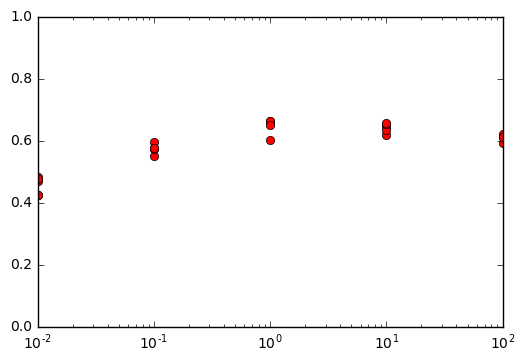

In [4]:
"""
from bokeh.plotting import figure, output_notebook, show

output_notebook()
p = figure(title="simple line example", x_axis_label='accuracy', y_axis_label='C')

Cs = list(data.keys())
for C, values in data.items():
    print("hola", Cs, values)
    p.circle(Cs, values, legend="Temp.", line_width=2)

# show the results
show(p)
"""
%matplotlib inline
import matplotlib.pyplot as plt

Cs = []
c_matrix = []
for C, values in image_data.items():
    print(C, values)
    Cs.append(C)
    c_matrix.append(values)

c_matrix = np.array(c_matrix)

for i, c in enumerate(Cs):
    #print(i, c, c_matrix[:, i])
    plt.plot(Cs, c_matrix[:, i], 'ro')
    plt.xscale('log')
    plt.axis([0.01, 100, 0, 1])
plt.show()

In [5]:
from utils import calculate_accuracy

# load dataset
dataset = load_scene_categories('scene_categories')

ACC = []
for loop in range(5):
    train_set, test_set = n_per_class_split(dataset, n=100)

    # setup training data
    X_train, y_train = split_into_X_y(train_set)
    X_test, y_test = split_into_X_y(test_set)
    ACC.append(calculate_accuracy(X_train, X_test, y_train, y_test, C=10))
print(ACC)
    

[0.6452261306532663, 0.6485762144053602, 0.6505862646566164, 0.6572864321608041, 0.6402010050251257]


In [7]:
acc_np = np.array(ACC)
print("Mean:", acc_np.mean())
print("Std:", acc_np.std())

Mean: 0.64837520938
Std: 0.00567579727559
